In [1]:
import sys
sys.path.append("../")
import pandas as pd
from utils.data_utils import DataLoader
from utils.feature_association import FeatureAssociation
from utils.encoding import CustomEncoder
from utils import visualization

from importlib import reload
reload(visualization)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<module 'utils.visualization' from '/home/studio-lab-user/ML1-XAI/Project/notebooks/../utils/visualization.py'>

In [2]:
data_loader = DataLoader(file_path='../data/raw/car.data' , target_column='class', test_size=0.2, random_state=42)

In [3]:
X, y = data_loader.get_data()

In [4]:
df = data_loader.get_df()

In [5]:
df.shape

(1728, 7)

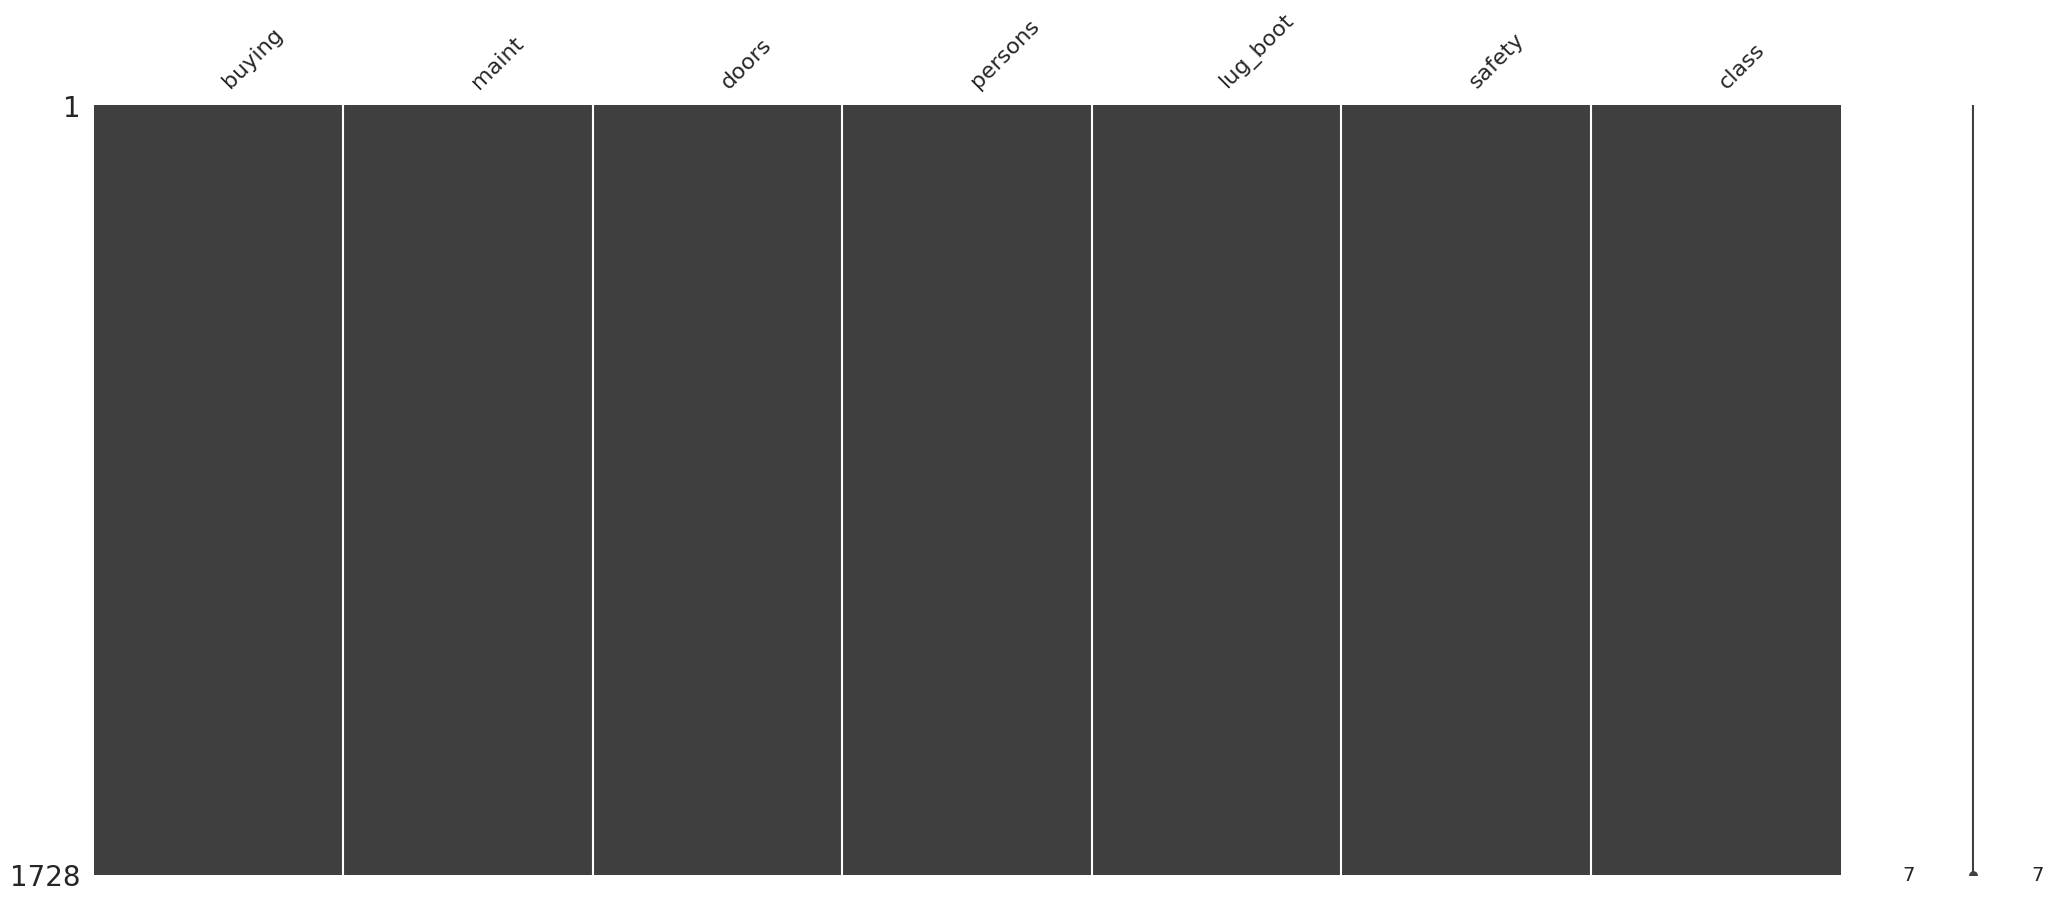

In [6]:
visualization.plot_missing(df)

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
for col in df.columns:
    print(col, df[col].unique())
    print('-'*30)
    print(df[col].value_counts())
    print("="*30 + '\n')

buying ['vhigh' 'high' 'med' 'low']
------------------------------
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

maint ['vhigh' 'high' 'med' 'low']
------------------------------
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

doors ['2' '3' '4' '5more']
------------------------------
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

persons ['2' '4' 'more']
------------------------------
2       576
4       576
more    576
Name: persons, dtype: int64

lug_boot ['small' 'med' 'big']
------------------------------
small    576
med      576
big      576
Name: lug_boot, dtype: int64

safety ['low' 'med' 'high']
------------------------------
low     576
med     576
high    576
Name: safety, dtype: int64

class ['unacc' 'acc' 'vgood' 'good']
------------------------------
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [10]:
c = df['class'].value_counts()
p = df['class'].value_counts(normalize=True).mul(100).round(2)

pd.concat([c, p], axis = 1, keys=['count', '%'])

,count,%
unacc,1210,70.02
acc,384,22.22
good,69,3.99
vgood,65,3.76


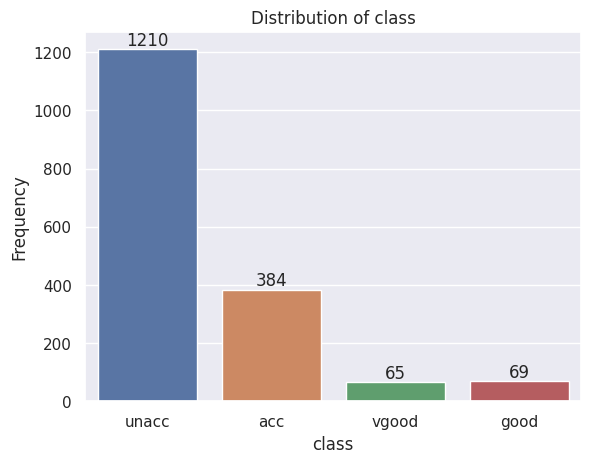

In [11]:
visualization.plot_count(df['class'])

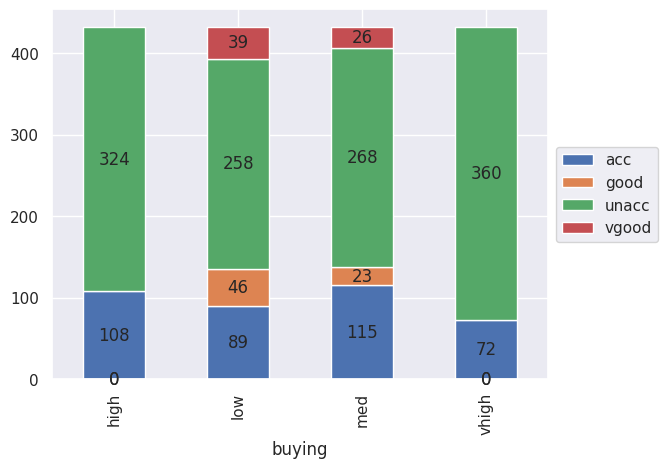

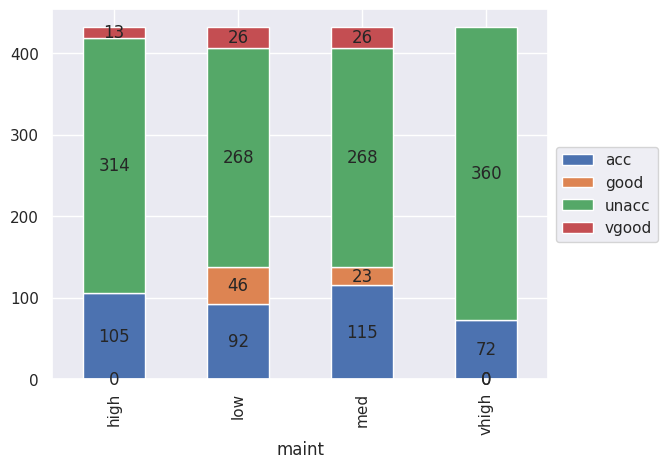

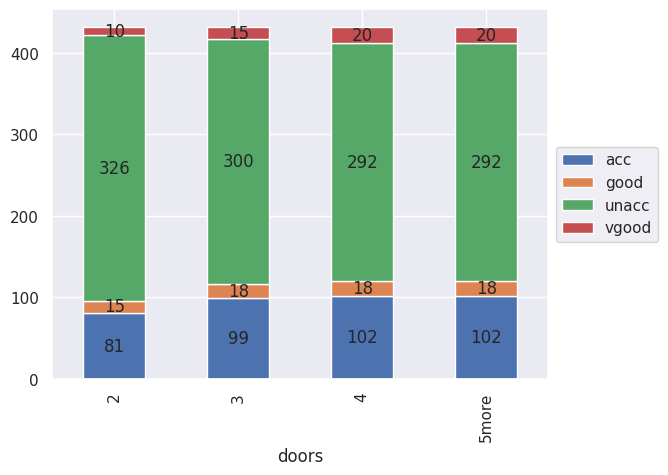

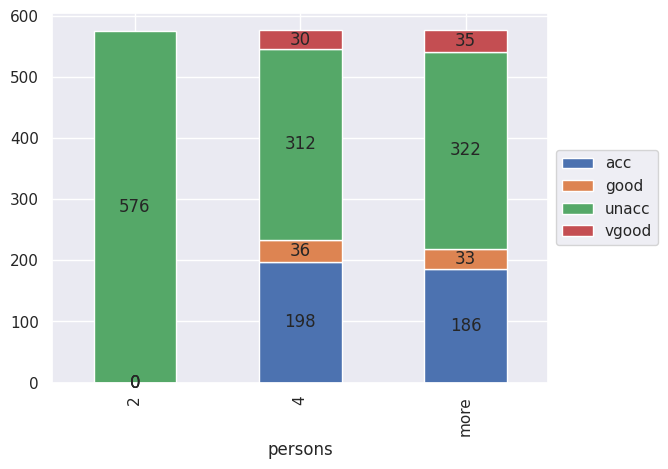

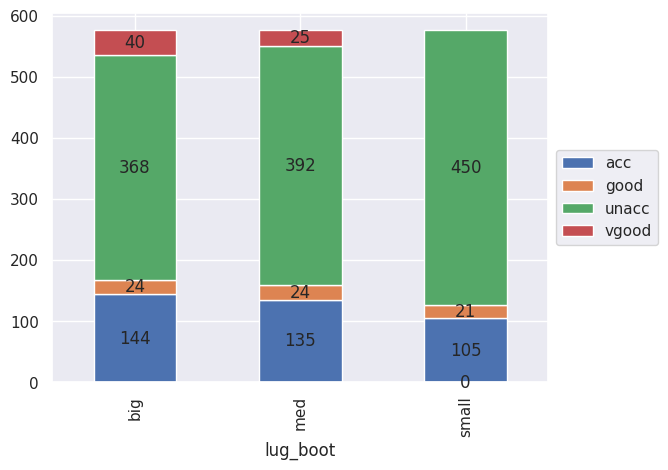

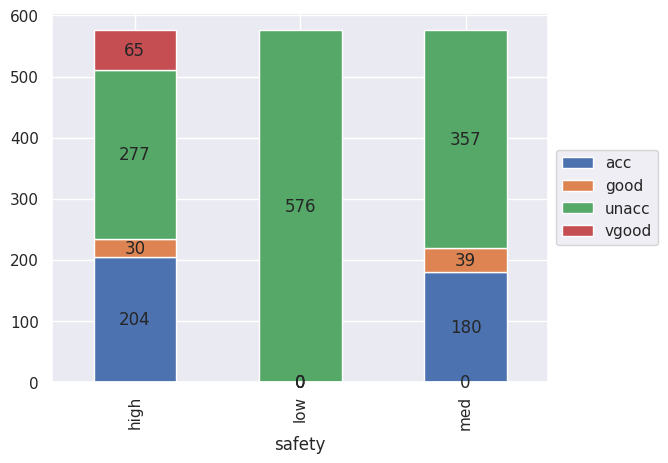

In [12]:
for col in df.columns[:-1]:
    visualization.crosstab_plot(df, col, 'class')

In [13]:
FeatureAssociation(df).get_df(significant=True)

Significant Associations


,Feature 1,Feature 2,p-value
0,buying,class,0.0000
1,maint,class,0.0000
2,persons,class,0.0000
3,lug_boot,class,0.0000
4,safety,class,0.0000


In [14]:
FeatureAssociation(df).get_df(significant=False)

Non Significant Associations


,Feature 1,Feature 2,p-value
0,buying,maint,1.000000
1,buying,doors,1.000000
2,buying,persons,1.000000
3,buying,lug_boot,1.000000
4,buying,safety,1.000000
...,...,...,...
11,doors,safety,1.000000
12,doors,class,0.320242
13,persons,lug_boot,1.000000
14,persons,safety,1.000000


# Train Test Split

In [15]:
X_train, y_train = data_loader.get_train_data()
X_test, y_test = data_loader.get_test_data()

Class ditribution in training data
       count      %
unacc    968  70.04
acc      307  22.21
good      55   3.98
vgood     52   3.76


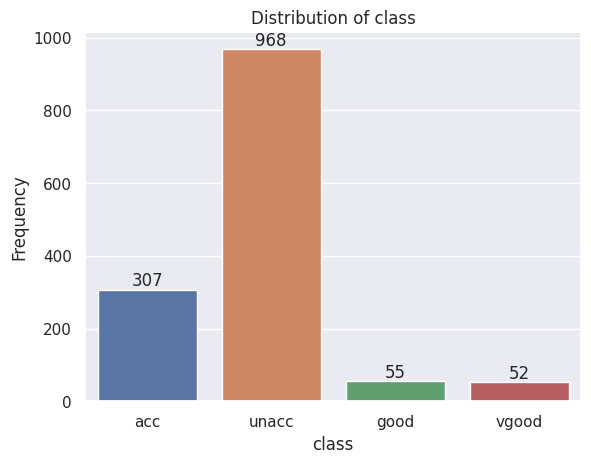

In [25]:
print('Class ditribution in training data')

c = y_train.value_counts()
p = y_train.value_counts(normalize=True).mul(100).round(2)
train_dist = pd.concat([c, p], axis = 1, keys=['count', '%'])

print(train_dist)

print('='*50)

visualization.plot_count(y_train)

Class ditribution in testing data
       count      %
unacc    242  69.94
acc       77  22.25
good      14   4.05
vgood     13   3.76


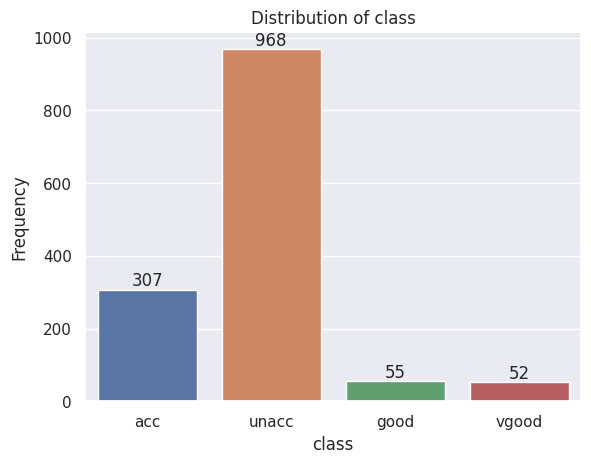

In [27]:
print('Class ditribution in testing data')

c = y_test.value_counts()
p = y_test.value_counts(normalize=True).mul(100).round(2)
test_dist = pd.concat([c, p], axis = 1, keys=['count', '%'])

print(test_dist)

print('='*50)

visualization.plot_count(y_train)